In [1]:
#%matplotlib notebook
import tssearch
import numpy as np
import matplotlib.pyplot as plt

### Load query and sequence

In [2]:
dict_ecg = tssearch.load_ecg_example()

tq, query = dict_ecg['tq'], dict_ecg['query']
ts, sequence = dict_ecg['ts'], dict_ecg['sequence']

### Time series visualization

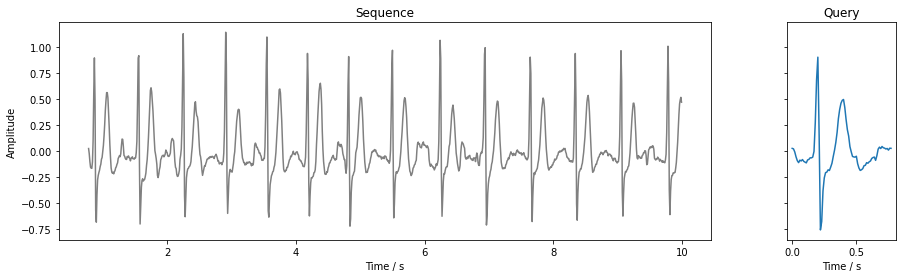

In [3]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [6, 1]}, sharey=True, figsize=(15,4))
axs[0].set_ylabel('Amplitude')
axs[0].set_xlabel('Time / s')
axs[0].set_title('Sequence')
axs[0].plot(ts, sequence , color='gray')
axs[1].set_title('Query')
axs[1].plot(tq, query)
axs[1].set_xlabel('Time / s');

### Define distance configuration file

In [4]:
dict_distances = {
    "elastic": {
        "Dynamic Time Warping": {
            "function": "dtw",
            "parameters": {"dtw_type": "sub-dtw", "alpha": 0.5},
        }
    },
    "lockstep": {
        "Euclidean Distance": {
            "function": "euclidean_distance",
            "parameters": "",
      }   
    }
}

# dict_distances = tssearch.get_distances_by_type("elastic")
# dict_distances = tssearch.get_distance_dict(["Dynamic Time Warping", "Euclidean Distance"])
# dict_distances['elastic']['Time Warp Edit Distance'] = tssearch.get_distances_by_type("elastic")['elastic']['Time Warp Edit Distance']
# dict_distances['elastic']['Longest Common Subsequence'] = tssearch.get_distances_by_type("elastic")['elastic']['Longest Common Subsequence']
# dict_distances['elastic']['Longest Common Subsequence']['parameters']['eps'] = 10

dict_distances

{'elastic': {'Dynamic Time Warping': {'function': 'dtw',
   'parameters': {'dtw_type': 'sub-dtw', 'alpha': 0.5}}},
 'lockstep': {'Euclidean Distance': {'function': 'euclidean_distance',
   'parameters': ''}}}

### Query search

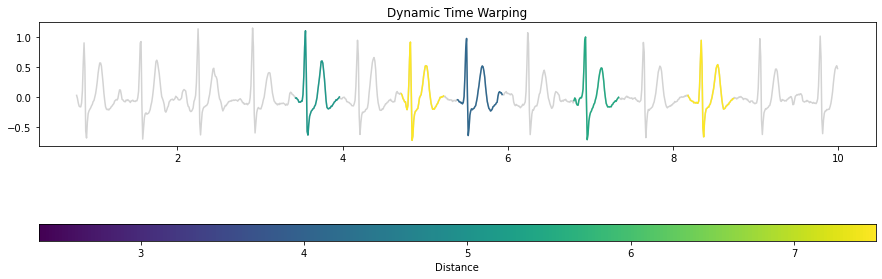

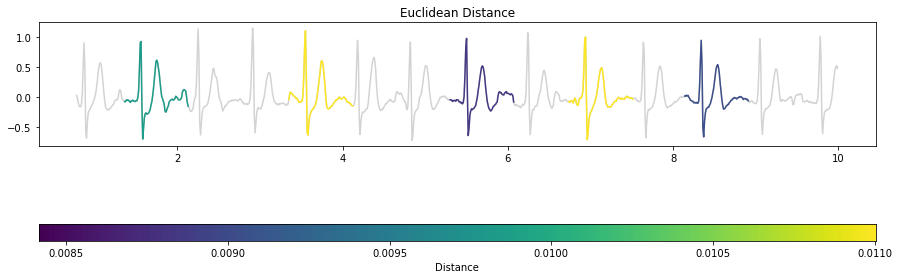

In [5]:
result = tssearch.time_series_search(dict_distances, query, sequence, tq, ts, output=("number", 5))

tssearch.plot_search_distance_result(result, sequence, ts);

### Query search with weights

In [6]:
sequence_copy = dict_ecg['sequence_noise'] 
weight = dict_ecg['weight']

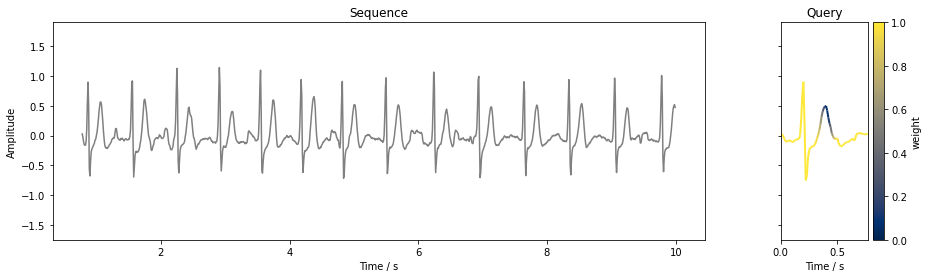

In [7]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [6, 1]}, sharey=True, figsize=(15,4))

axs[0].set_ylabel('Amplitude')
axs[0].set_title('Sequence')
axs[0].plot(ts, sequence_copy, color='gray')
axs[0].set_xlabel('Time / s')
axs[1].set_title('Query')
axs[1].set_xlabel('Time / s')
#axs[1].plot(tq, query, 'lightgray', alpha=0.5)
tssearch.plot_weight_query(tq, query, weight, axs=axs[1], cmap='cividis', fig=fig)

[array([<AxesSubplot:title={'center':'Dynamic Time Warping'}>,
        <AxesSubplot:xlabel='Distance'>], dtype=object),
 array([<AxesSubplot:title={'center':'Euclidean Distance'}>,
        <AxesSubplot:xlabel='Distance'>], dtype=object)]

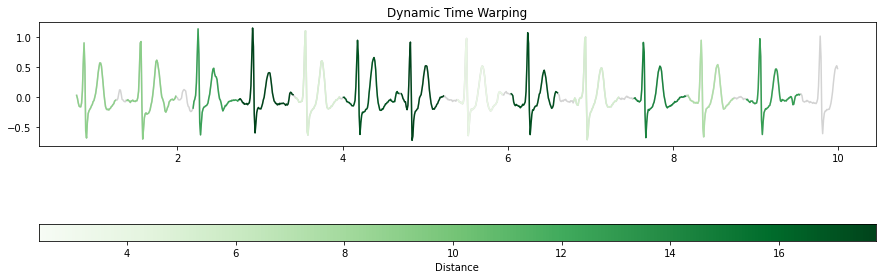

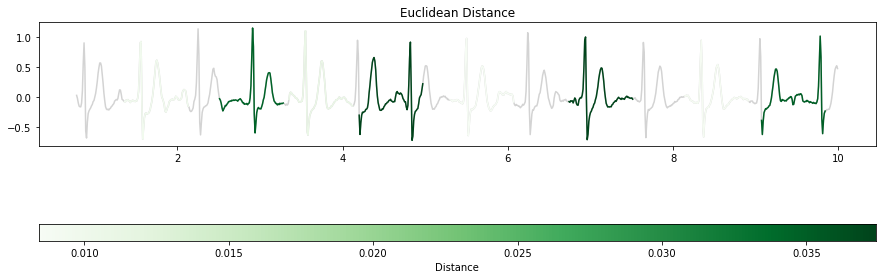

In [8]:
result = tssearch.time_series_search(dict_distances, query, sequence_copy, tq, ts, output=("number", 13))

tssearch.plot_search_distance_result(result, sequence_copy, ts, cmap_name='Greens')

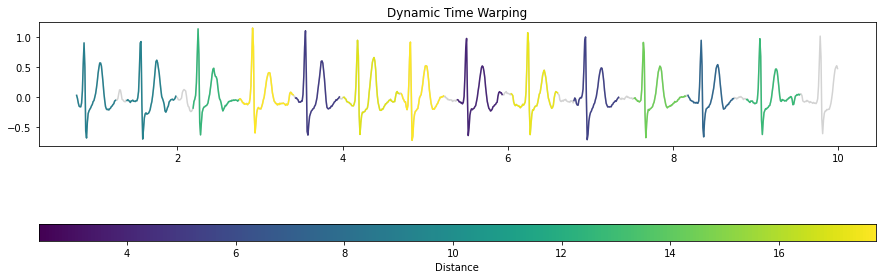

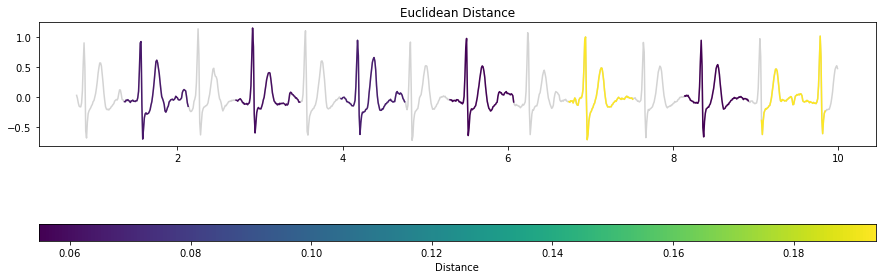

In [9]:
result = tssearch.time_series_search(dict_distances, query, sequence_copy, tq, ts, weight, output=("number", 13))

tssearch.plot_search_distance_result(result, sequence_copy, ts);